# Audio Processing in Python
* Audio waves are basically signals, and in this notebook, we discuss basic audio signal analysis on some audio files.
* An audio signal can be categorized into following parts:
       (1) Speech : uttered by humans, which follow some language specific rules
       (2) Music : songs, instruments etc.
       (3) Others : bird sounds, animal sounds such as dog barking etc., 
       (4) Vehicle, machinery sound etc.
 
In this notebook, we will learn following:
- How to load an audio file?
- How to obtain signal information?
- How to play an audio file?
- How to represent the signal in time domain?
- How to visualize the signal characteristics in frequency domain?

Various libraries and alternatives exist for audio signal analysis in Python. In this notebook, we will see two ways for processing audio waves : (i) using SciPy (ii) using Librosa.

# Some Terminologies

Before starting, let us understand some terminologies related to audio and signal processing which will help in understanding and following this notebook in a better way.

* Analog speech signal : The speech which usually is uttered by humans and is propogated through air.
* Digital speech signal : The speech (in terms of samples) after performing analog-to-digital conversion using an ADC device. In this form, speech signal is in form of digitized samples.
* Frequency of a signal : The number of cycles a signal repeats in 1 second duration.
* Amplitude of a signal : It is related to loudness of speech (for speech signal). Depending on the type of the signal, it can be energy, voltage etc.

## First Method : Using SciPy

**Step 1. Import all necessary packages**

In [1]:
# Importing packages
from scipy.io import wavfile # for scientific and signal processing in Python
from matplotlib import pyplot as plt # for visualization
import numpy as np # for array processing
%matplotlib inline

In [2]:
#Check the list of directories and files 
import os
os.listdir('../input')

['soundwaves']

**Step 2. Load audio file**

In [3]:
# Load the data and calculate the time of each sample
samplerate, data = wavfile.read('/kaggle/input/soundwaves/SoundWaves/dog.wav')
print('Sample rate of the signal:',samplerate,"Hz")
print('Contents of the signal:',data)
print('Length of the signal:',len(data))

Sample rate of the signal: 22050 Hz
Contents of the signal: [  0  -1  -1 ...  51  95 158]
Length of the signal: 52128


In [4]:
# Install the pydub library 

# Check that kernel Internet is connected before running this cell
! pip install pydub

In [5]:
# Play an audio file

from pydub import AudioSegment
import IPython

IPython.display.Audio(data,rate=samplerate)

In [6]:
times = np.arange(len(data))/float(samplerate) # Calculate the duration of the signal

# How times is different from data?
print('Minimum time (sec):', min(times))
print('Maximum time (sec):', max(times))
print('Minimum data point value:', min(data))
print('Maximum data point value:', max(data))

duration = len(data)/float(samplerate)

print('Duration of the audio in seconds: {:.2f}'.format(duration))

print('Number of samples:',len(data))

Minimum time (sec): 0.0
Maximum time (sec): 2.364036281179138
Minimum data point value: -32768
Maximum data point value: 32767
Duration of the audio in seconds: 2.36
Number of samples: 52128


**Step 3. Plot the raw signal (i.e. audio waveform)**

This is a time domain representation of an audio signal, where only time and corresponding amplitude information is available. This kind of representation does not provide much information.

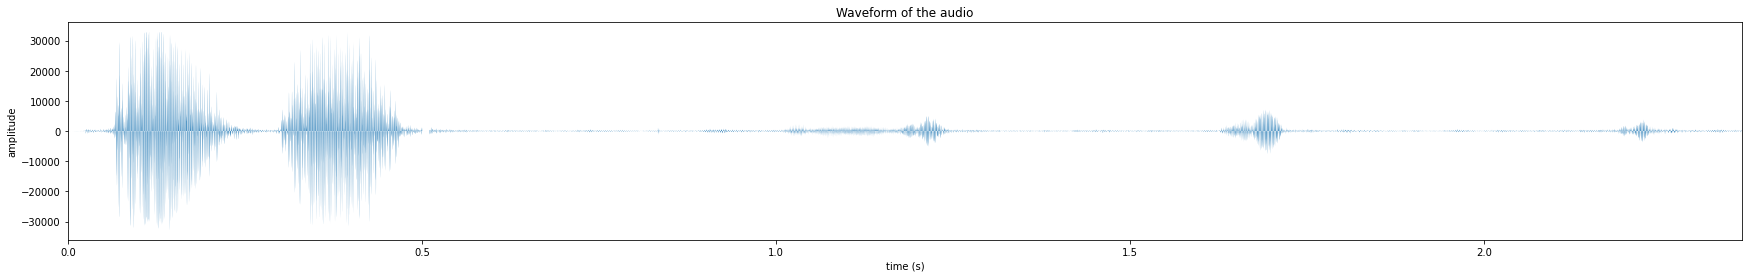

In [7]:
# Time domain representation
# Make the plot

plt.figure(figsize=(30, 4))

plt.fill_between(times, data)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.xlim(times[0],times[-1])
plt.title('Waveform of the audio')
# You can set the format by changing the extension
# like .pdf, .svg, .eps
plt.savefig('plot_scipy_audio.png', dpi=300)
plt.show()

**Step 4. Plot Frequency Spectrum**

In order to obtain additional information, it is recommended to transform the signal from time domain to frequency domain. This is accomplished by Fourier Transform. For dealing with audio signals, usually short-time Fourier transform (STFT) is used. This process calculates the Fourier series coefficients to represent the signal which helps in capturing the frequency component based information also from the signal. 

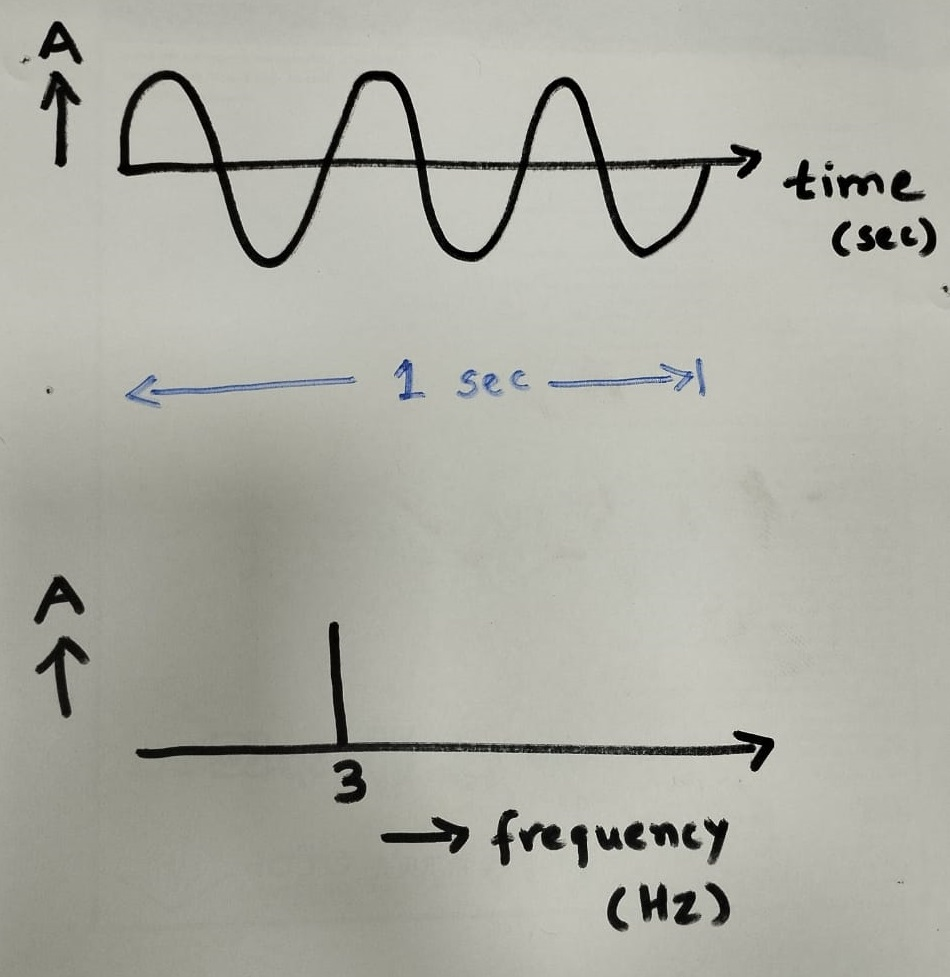

It is therefore possible to detect the characterstic of the signal i.e. whether it is single tone signal, or dual tone signal or a composite signal comprising multiple frequencies. All major signal processing algorithms apply STFT as a preprocessing so that they can be applied to the signal directly.

The above image shows a single tone signal in time domain with 3Hz frequency. Its frequency domain representation in form of spectrum shows a spike at 3Hz. 

You can see that time domain representation displays only time and amplitude (i.e. loudness) values, whereas frequency domain represents time and frequency based information.

In real life, audio signals are made up of multiple frequencies and their frequency spectrum is not naive like this one. The following graph illustrates the spectrum of our input audio signal which has lot of spikes at different frequencies indicating the complexity of the signal.

*If you are interested to understand the application of Frequency domain analysis for determining which phone number was dialled based on the audio of dialled keys, then look for my notebook which will be released shortly.*

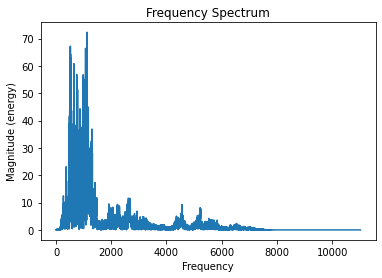

In [8]:
# Plotting the Frequency Spectrum of the signal

[a,b,c] = plt.magnitude_spectrum(data,Fs=samplerate)

# display the plot

plt.title('Frequency Spectrum')
plt.show()

**Step 5. Draw spectrogram**

Spectrogram is an alternative visualization of audio signal in frequency domain which provides three dimensional information of the signal simultaneously i.e. time, frequency and amplitude.

A spectrogram is read from bottom to top. 
* The horizontal axis represents the time dimension.
* The vertical axis represents the frequency dimension.
* The third (loudness) dimension is reflected by the color of the spectrogram. Dark color indicates no sound (silence) region, and otherwise color changes from bright to dark depending on the frequency components present in the signal at a specific time stamp. 

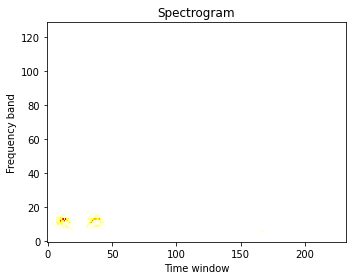

In [9]:
from scipy import signal
freqs, times, spectrogram = signal.spectrogram(data)

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

# Second Method : Using Librosa

**Now, we will see the usage of Librosa library for preliminary audio processing.**

Librosa is a very well-versed library for audio analysis and processing in Python. You can get more information about its functionalities from the link : https://librosa.org/doc/latest/index.html

In [10]:
import librosa

audio_path = '../input/soundwaves/SoundWaves/dog.wav'

x , sr = librosa.load(audio_path)

print("Sample rate:",sr)
print("Duration of the signal in seconds: {:.2f}".format(len(x)/sr))

Sample rate: 22050
Duration of the signal in seconds: 2.36


In [11]:
import IPython.display as ipd
ipd.Audio(audio_path)

**Visualizing audio files**

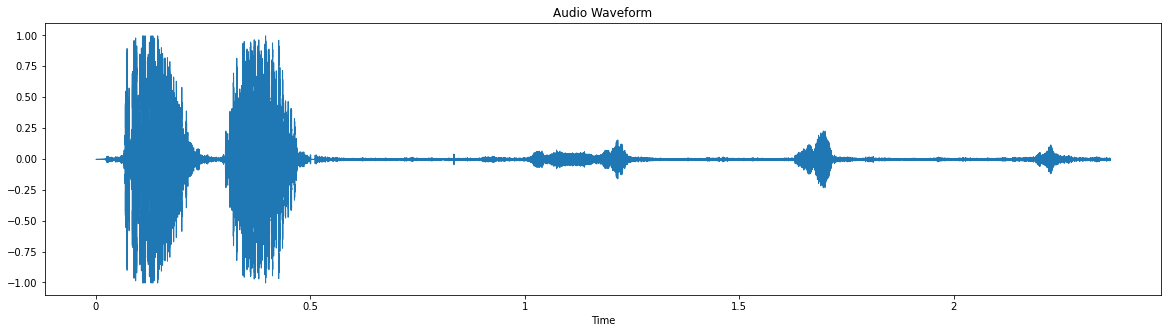

In [12]:
import librosa.display

plt.figure(figsize=(20, 5))
plt.title('Audio Waveform')
librosa.display.waveshow(x, sr=sr)

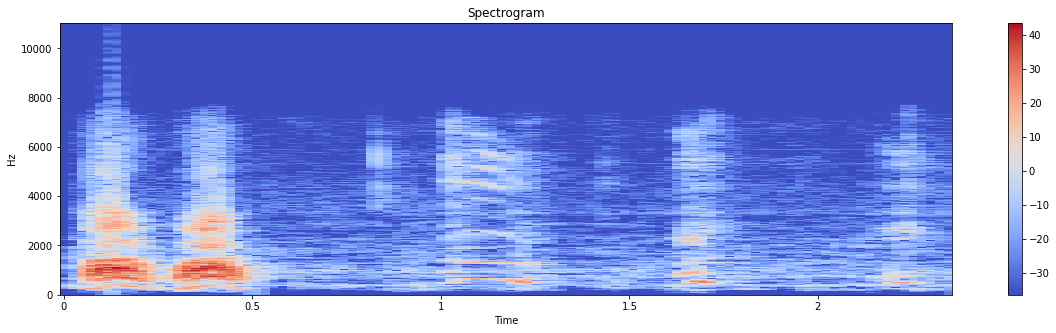

In [13]:
# This is spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.title('Spectrogram')
plt.colorbar()

Readers are encouraged to work with other audio files (available in the soundwaves folder) or even try with their own audio files to check how the waveform, spectrum and spectrogram looks.

**ALERT**
If you use *cow.wav* then you may face some error because it is a two channel wav file. Thus, use following code in case you want to use any audio file except mono-channel audio file.

data1 = data[:,0]

data = data1

**In the next notebook, I will demonstrate some basic features used to represent audio in time domain and frequency domain which can be used for various machine learning tasks.**

**References**

https://www.kaggle.com/vbookshelf/play-audio-read-the-files-create-a-spectrogram
